In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv("L:/Practice ML Basic Projects/DATA/sms span detection/spam.csv", encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [13]:
df[df['Unnamed: 2'].notnull()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [84]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , axis=1)

In [85]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [30]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [86]:
df.duplicated().sum()

403

In [87]:
df = df.drop_duplicates()

<Axes: xlabel='v1', ylabel='count'>

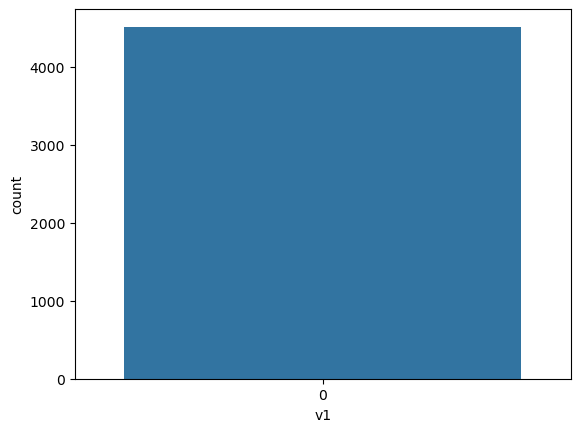

In [39]:
# help(sns.countplot)
sns.countplot(data=df , x=df[df['v1']==0]['v1'])

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kandarp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [67]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kandarp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [88]:
df['num_chars'] = df['v2'].apply(len)

In [89]:
df['num_words'] = df['v2'].apply(lambda x : len(nltk.word_tokenize(x)))

In [90]:
df['num_sentences'] = df['v2'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [91]:
df.head(10)

,v1,v2,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [71]:
from nltk.corpus import stopwords
words = stopwords.words('english')

# Steps
- Lower Case
- Tokenize - sent into list
- Remove special characters
- remove stop words
- Stemming

In [142]:
from nltk.stem.porter import PorterStemmer
ps  = PorterStemmer()
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum() and i not in words:
            y.append(ps.stem(i))

    return " ".join(y)

In [143]:
text_transform(df['v2'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [144]:
df['v2_transformed'] = df['v2'].apply(text_transform)

In [145]:
df.head(10)

,v1,v2,num_chars,num_words,num_sentences,v2_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [242]:
df.iloc[2]['v2']

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [146]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=20,background_color='white')

In [155]:
spam_wc = wc.generate(df[df['v1']==1]['v2_transformed'].str.cat(sep=" "))

In [157]:
ham_wc = wc.generate(df[df['v1']==0]['v2_transformed'].str.cat(sep=" "))

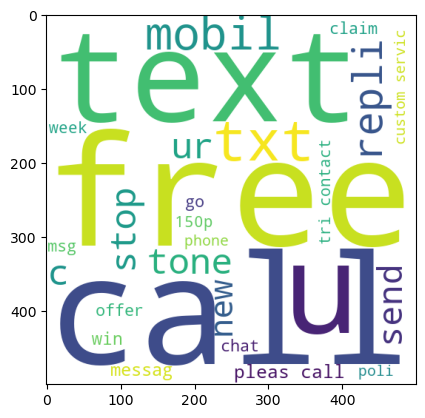

In [156]:
plt.imshow(spam_wc)

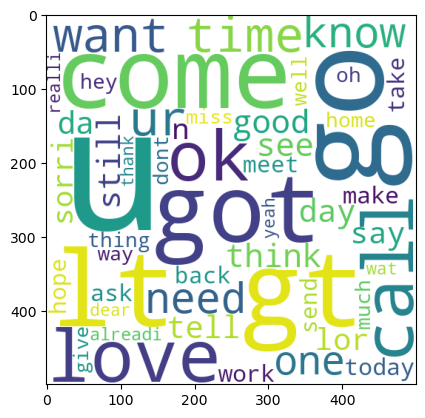

In [158]:
plt.imshow(ham_wc)

In [163]:
spam_count = []
for msg in df[df['v1']==1]['v2_transformed'].tolist():
    for word in msg.split():
        spam_count.append(word)

In [164]:
from collections import Counter
spams = pd.DataFrame(Counter(spam_count).most_common(40))

In [165]:
spams

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


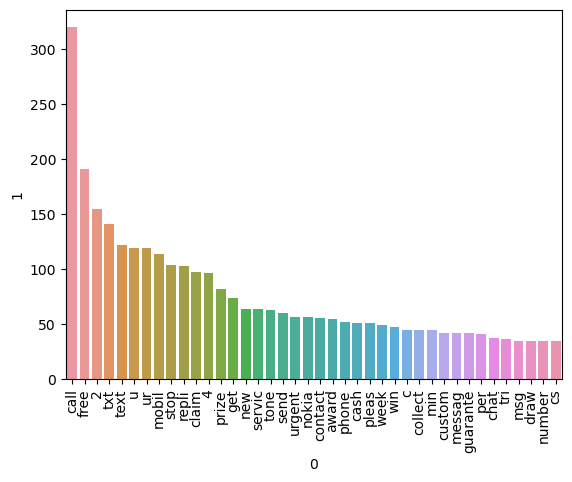

In [166]:
sns.barplot(x=spams[0] , y=spams[1])
plt.xticks(rotation=90);

In [176]:
ham_count = []
for msg in df[df['v1']==0]['v2_transformed'].tolist():
    for word in msg.split():
        ham_count.append(word)
hams = pd.DataFrame(Counter(ham_count).most_common(40))
hams.head(10)

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


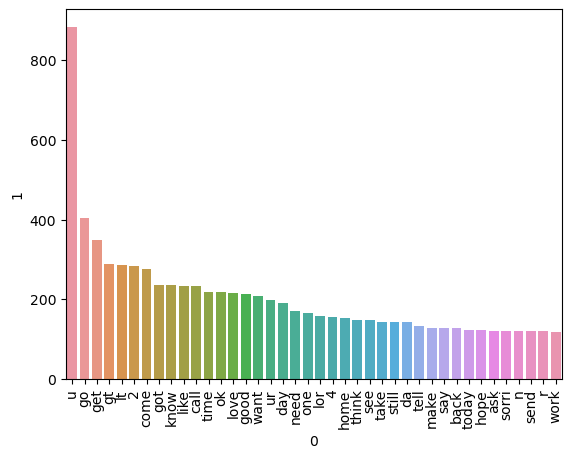

In [177]:
sns.barplot(x=hams[0] , y=hams[1])
plt.xticks(rotation=90);

In [194]:
from sklearn.feature_extraction.text import CountVectorizer ,  TfidfVectorizer
cv = CountVectorizer(stop_words='english')
tfidf = TfidfVectorizer(max_features=3000)

In [195]:
X = tfidf.fit_transform(df['v2_transformed']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [196]:
y = df['v1']

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=101)

In [184]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB 
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [198]:
gb.fit(x_train , y_train)
gb_pred = gb.predict(x_test)
print(classification_report(y_test , gb_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       893
           1       0.50      0.81      0.62       141

    accuracy                           0.86      1034
   macro avg       0.73      0.84      0.77      1034
weighted avg       0.90      0.86      0.88      1034



In [199]:
mb.fit(x_train , y_train)
mb_pred = mb.predict(x_test)
print(classification_report(y_test , mb_pred))
print(precision_score(y_test , mb_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       893
           1       1.00      0.81      0.89       141

    accuracy                           0.97      1034
   macro avg       0.99      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034

1.0


In [200]:
bb.fit(x_train , y_train)
bb_pred = bb.predict(x_test)
print(classification_report(y_test , bb_pred))
print(precision_score(y_test , bb_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       893
           1       0.97      0.83      0.90       141

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

0.975


# I would prefer BernoulliNB as we need more accuracy for spam message, and it has 0.99 precesion for span msgs

#  Let's try to add MB and BB to check if we can imporove 

In [215]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
mnb = MultinomialNB()
bnb = BernoulliNB()
# svc = SVC(kernel='sigmoid' , gamma=1.0 , probability=True)
# adding svc didn't improve anything so removed it

vc = VotingClassifier(estimators=[('mnb',mnb) , ('bnb',bnb)] , voting='soft')

In [216]:
vc.fit_transform(x_train , y_train)

array([[9.15151270e-01, 8.48487299e-02, 9.99983431e-01, 1.65691373e-05],
       [4.47516069e-01, 5.52483931e-01, 9.99055180e-01, 9.44819734e-04],
       [9.96348287e-01, 3.65171267e-03, 9.99999997e-01, 2.67615462e-09],
       ...,
       [9.79096562e-01, 2.09034385e-02, 9.99998845e-01, 1.15473346e-06],
       [9.86349970e-01, 1.36500298e-02, 9.99999606e-01, 3.93975805e-07],
       [9.94366707e-01, 5.63329347e-03, 9.99999999e-01, 6.64545617e-10]])

In [217]:
vc_pred = vc.predict(x_test)

In [218]:
print(classification_report(y_test , vc_pred))
print(precision_score(y_test , vc_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       893
           1       1.00      0.84      0.92       141

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

1.0


In [221]:
import pickle
pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(vc , open('algorithm.pkl','wb'))

In [224]:
pickle.dump(text_transform , open('text_transformer.pkl' , 'wb'))

In [238]:
text = text_transform("You have preapproved pre approved")
text = tfidf.transform([text])
vc.predict(text)

array([0], dtype=int64)

In [239]:
mb.predict(text)

array([0], dtype=int64)